<a href="https://colab.research.google.com/github/enino84/Data-Assimilation-202210/blob/main/DA_22022022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasts and Numerical Models - Duffing Equation and Lorenz63 Model

Duffing Equation

\begin{eqnarray}
x''+\delta x' + \alpha x +\beta x^3= \gamma \cos(\omega t)
\end{eqnarray}

this is equivalent to

\begin{eqnarray}
x''=-\delta x' - \alpha x -\beta x^3+ \gamma \cos(\omega t)
\end{eqnarray}

https://numpy.org/

In [ ]:
import numpy as np

In [ ]:
#(alpha, beta, delta, gamma, omega)
def f(x, t, args=(1, 5, 0.02, 8, 0.65)):
  alpha = args[0];
  beta = args[1];
  delta = args[2];
  gamma = args[3];
  omega = args[4];
  return (x[1], -delta*x[1] - alpha*x[0] - beta * x[0]**3 + gamma * np.cos(omega * t))

In [ ]:
from scipy.integrate import odeint

Initial condition $x'(0) = 1$ and $x(0) = 0$, $t \in [0,\, 200]$, and the sample size equals 200

1. Creando la trayectoria de referncia.
2. Creando el background inicial

In [ ]:
np.random.seed(10)

x0  = np.array([0, 1], dtype=np.float32);
t   = np.linspace(0,50, 3000);

xr  = odeint(f, x0, t); #reference trajectory

xb0 = x0 + np.random.randn(2,)

xb0 = odeint(f, xb0, t[:50])[-1,:]; #initial background



Reference Trajectory

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

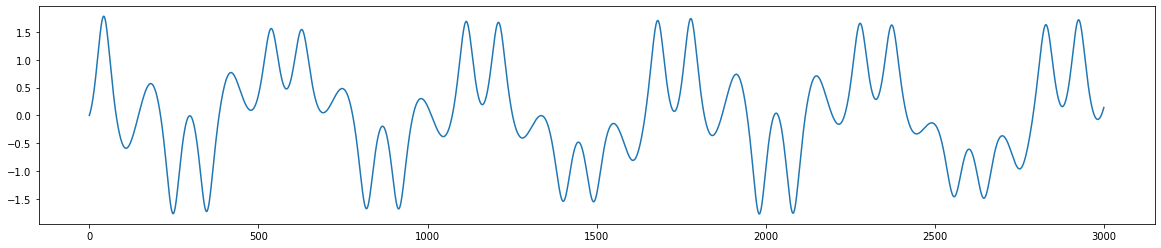

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(xr[:,0])

3. Generando el ensemble inicial

In [ ]:
x_samples = [];
samples = 200;
for i in range(0, samples):
  xi = xb0 + 0.1*np.random.randn(2,); #perturbation ~ 0.1
  xs = odeint(f, xi, t[50:100])[-1,:];
  x_samples.append(xs);
Xb = np.array(x_samples, dtype=np.float32).T;

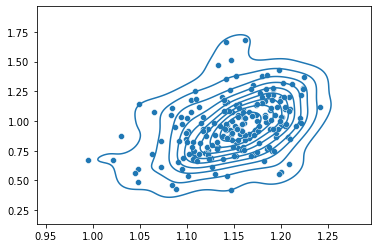

In [ ]:
sns.kdeplot(x=Xb[0,:], y=Xb[1,:])
sns.scatterplot(x=Xb[0,:], y=Xb[1,:])

In [ ]:
Pb = np.cov(Xb);

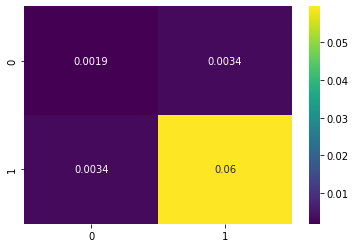

In [ ]:
sns.heatmap(Pb, annot=True, cmap='viridis')

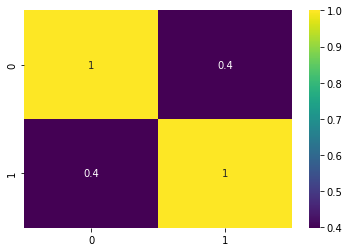

In [ ]:
Cb = np.corrcoef(Xb);
sns.heatmap(Cb, annot=True, cmap='viridis')

4. Assimilation Steps

In [ ]:
errobs = 0.1;
k = 1;


R = (errobs)**2*np.eye(2);
R_inv = (1/(errobs)**2)*np.eye(2);
y = xr[100*k,:] + errobs*np.random.randn(2,); #This is what we have

Ys = y + errobs*np.random.randn(samples, 2);
Ys = Ys.T;

Pb = np.cov(Xb);

Pb_inv = np.linalg.inv(Pb);

Pa_inv = Pb_inv + R_inv;
rhs    = Pb_inv@Xb + R_inv@Ys;

Xa = np.linalg.solve(Pa_inv, rhs);

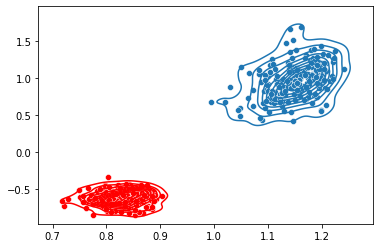

In [ ]:
sns.kdeplot(x=Xb[0,:], y=Xb[1,:])
sns.scatterplot(x=Xb[0,:], y=Xb[1,:])

sns.kdeplot(x=Xa[0,:], y=Xa[1,:], color='red')
sns.scatterplot(x=Xa[0,:], y=Xa[1,:], color='red')

plt.plot(xr[100*k,:][0], xr[100*k,:][1], 'ok', )

In [ ]:
Xa.shape

(2, 200)

In [ ]:
Ys.shape

(200, 2)

In [ ]:
Pb

array([[0.00191831, 0.00400762],
       [0.00400762, 0.05267004]])

In [ ]:
y

array([-0.40170366, -0.69673276])

In the beggining, small perturbations are not amplified

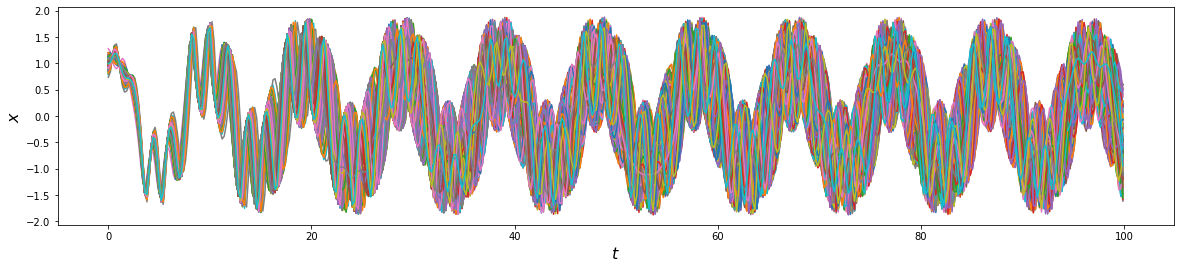

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t[:500], x[:500,0], '-');

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});

At the end, small perturbations have been amplified by the non-linear dynamics of the system

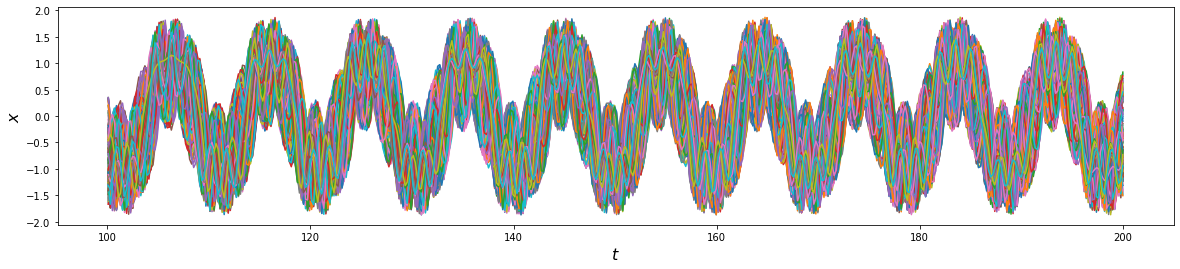

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t[500:], x[500:,0], '-');

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});

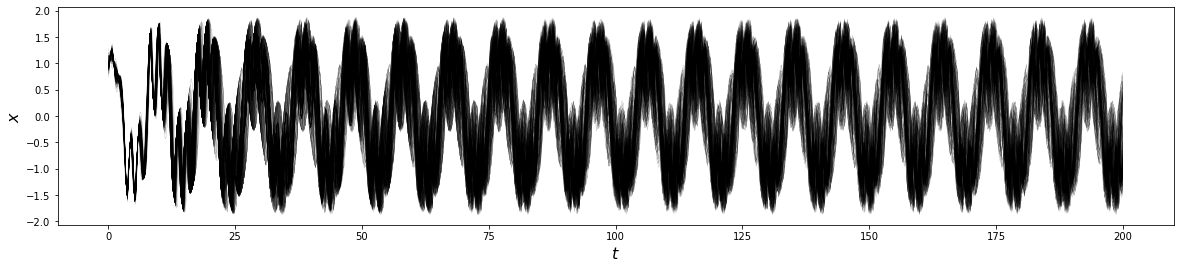

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t, x[:,0], '-k', alpha=.5, lw=0.2);

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});

Initial distribution (initial conditions)

\begin{eqnarray}
\begin{bmatrix}
x(0) \\
x'(0)
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_0 \\
\epsilon_1
\end{bmatrix}
\end{eqnarray}

where $\epsilon_i \sim \mathcal{N}(0,\, 0.1^2)$

In [ ]:
import seaborn as sns

https://seaborn.pydata.org/

https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot

In [ ]:
samples

200

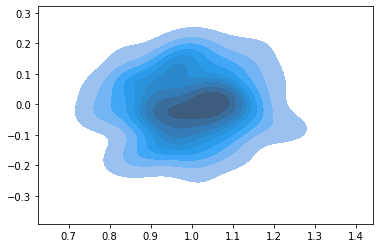

In [ ]:
x_initial = x0.reshape(-1,1) + 0.1*np.random.randn(2,samples)

sns.kdeplot(x=x_initial[0,:], y=x_initial[1,:], fill=True)

Forecast distribution

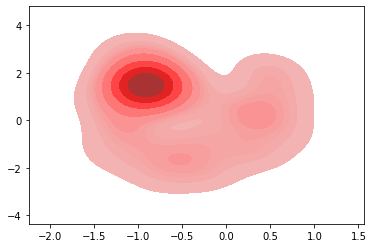

In [ ]:
x_final = np.zeros((samples,2));
for i in range(0, samples):
  x_final[i,:] = x_samples[i][-1,:];

sns.kdeplot(x=x_final[:,0], y=x_final[:,1], fill=True, color='red')

# Tres soluciones

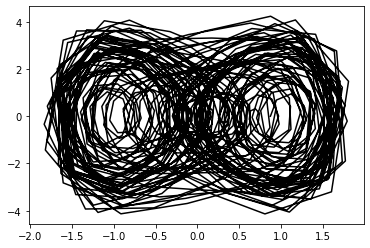

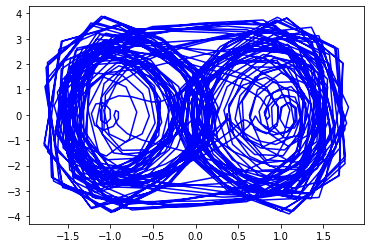

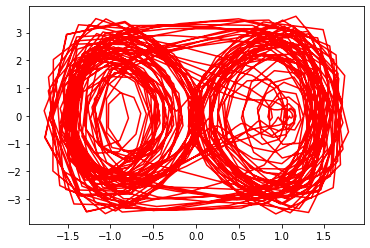

In [ ]:
plt.figure()
plt.plot(x_samples[0][:,0], x_samples[0][:,1], '-k');

plt.figure()
plt.plot(x_samples[100][:,0], x_samples[100][:,1], '-b');

plt.figure()
plt.plot(x_samples[150][:,0], x_samples[150][:,1], '-r');

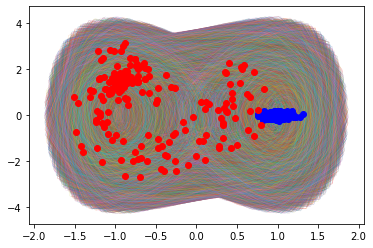

In [ ]:
#plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(x[:,0], x[:,1], '-', alpha=.5, lw=0.2);


plt.plot(x_initial[0,:], x_initial[1,:], 'ob', lw=1);
plt.plot(x_final[:,0], x_final[:,1], 'or', lw=1);

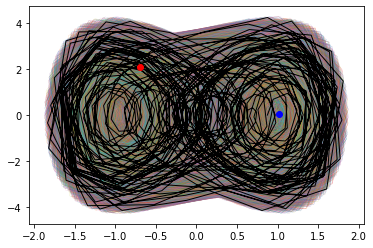

In [ ]:
#plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(x[:,0], x[:,1], '-', alpha=.5, lw=0.2);

plt.plot(x_samples[0][:,0], x_samples[0][:,1], '-k', lw=1);
plt.plot(x_initial[0,0], x_initial[1,0], 'ob', lw=1);
plt.plot(x_final[0,0], x_final[0,1], 'or', lw=1);

Conclusiones:

1. La solución a problemas de valor inicial en Python las llevamos a cabo con `odeint`.

2. Pequeñas perturbaciones en la condición inicial derivan en soluciones finales diferentes producto de la dinámica no lineal del sistema.

3. La distribución del forecast es posible que no sea Normal (múltiples modos)

Implementar:
1. Lorenz 63 - https://es.wikipedia.org/wiki/Atractor_de_Lorenz
2. Lorenz 96 - https://en.wikipedia.org/wiki/Lorenz_96_model

## **Lorenz 63**

In [ ]:
#x[0] = x
#x[1] = y
#x[2] = z
def lorenz63(x,t,args=(10, 28, 8/3)):
  a = args[0];
  b = args[1];
  c = args[2];
  return [a*(x[1]-x[0]),
          x[0]*(b-x[2])-x[1],
          x[0]*x[1]-c*x[2]];

## 1. Random solution

In [ ]:
x0 = np.random.randn(3,)
t = np.linspace(0,100,5000)

## 2. Numerical Integration

In [ ]:
xs = odeint(lorenz63, x0, t);

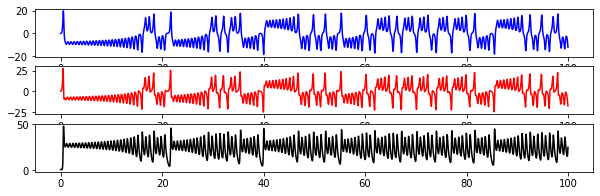

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(3,1,1);
plt.plot(t, xs[:,0],'-b');
plt.subplot(3,1,2);
plt.plot(t, xs[:,1],'-r');
plt.subplot(3,1,3);
plt.plot(t, xs[:,2],'-k');

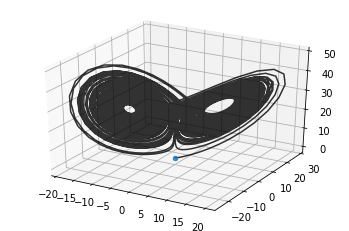

In [ ]:
ax = plt.axes(projection='3d')
ax.plot3D(xs[:,0],xs[:,1],xs[:,2],'-k',alpha=.8)
ax.scatter3D(x0[0],x0[1],x0[2],'or',alpha=.8)
#ax.view_init(60, 60)

In [ ]:
xs = odeint(lorenz63, x0, t);
x0 = xs[-1,:];

In [ ]:
x0

array([-12.16696046, -17.57044811,  24.70017455])

In [ ]:
N = 40;
traj = [];
for e in range(0, N):
  xe = x0 + np.random.randn(3,)
  xs_e = odeint(lorenz63, xe, t);
  traj.append(xs_e)

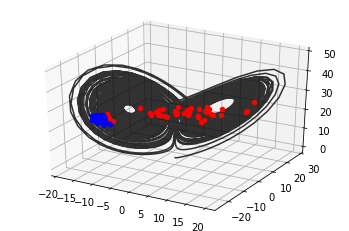

In [ ]:
ax = plt.axes(projection='3d')
ax.plot3D(xs[:,0],xs[:,1],xs[:,2],'-k',alpha=.8)
ax.scatter3D(x0[0],x0[1],x0[2],'or',alpha=.8)

for e in range(0, N):
  xe = traj[e];
  #ax.plot3D(xe[:,0],xe[:,1],xe[:,2],'-b',alpha=.2)
  ax.scatter3D(xe[0,0],xe[0,1],xe[0,2],'o',color='b',cmap='Greens')
  ax.scatter3D(xe[-1,0],xe[-1,1],xe[0,2],'o',color='r',cmap='Greens')
#ax.view_init(60, 60)

In [ ]:
x0

array([-12.16696046, -17.57044811,  24.70017455])